# Análise variação do preço da gasolina

**Objetivo da análise**

Gerar uma tabela com a variação percentural ano a ano do preço médio da gasolina comum no estado do Rio de Janeiro.

**Base de Dados no Kaggle**

[https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil)

## Carregando os Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
db = pd.read_csv("precos.tsv", sep="\t", parse_dates=["DATA INICIAL", "DATA FINAL"])

In [3]:
db.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [4]:
db.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

In [6]:
db_tratada = db.loc[:, :"MARGEM MÉDIA REVENDA"].copy()

In [7]:
db_tratada.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA'],
      dtype='object')

In [8]:
db_tratada.columns = ['dt_inicial', 'dt_final', 'regiao', 'estado', 'produto',
       'nm_postos_pesquisados', 'unidade_medida',
       'preco_medio_revenda', 'std_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda']

In [9]:
db_tratada

,dt_inicial,dt_final,regiao,estado,produto,nm_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0


In [10]:
db_tratada['estado']

0           DISTRITO FEDERAL
1                      GOIAS
2                MATO GROSSO
3         MATO GROSSO DO SUL
4                    ALAGOAS
                 ...        
120818               RORAIMA
120819        SANTA CATARINA
120820             SAO PAULO
120821               SERGIPE
120822             TOCANTINS
Name: estado, Length: 120823, dtype: object

In [11]:
db_tratada['regiao']

0         CENTRO OESTE
1         CENTRO OESTE
2         CENTRO OESTE
3         CENTRO OESTE
4             NORDESTE
              ...     
120818           NORTE
120819             SUL
120820         SUDESTE
120821        NORDESTE
120822           NORTE
Name: regiao, Length: 120823, dtype: object

In [12]:
len(db_tratada['estado'].unique())

27

In [13]:
db_tratada['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [14]:
db_tratada['dt_final'].max()

Timestamp('2021-05-01 00:00:00')

## Filtrando Datasets

In [15]:
df_rio_gasolina = db_tratada.query("estado == 'RIO DE JANEIRO' and produto == 'GASOLINA COMUM'").copy()

In [16]:
df_rio_gasolina

,dt_inicial,dt_final,regiao,estado,produto,nm_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda
12086,2004-05-09,2004-05-15,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.700,2.599,0.254
12113,2004-05-16,2004-05-22,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.700,2.599,0.252
12140,2004-05-23,2004-05-29,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.700,2.599,0.252
12167,2004-05-30,2004-06-05,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.730,2.599,0.251
12194,2004-06-06,2004-06-12,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.760,2.599,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...
120003,2021-03-28,2021-04-03,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,276,R$/l,6.102,0.197,5.599,6.559,-99999.0
120181,2021-04-04,2021-04-10,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,275,R$/l,6.007,0.193,5.299,6.499,-99999.0
120360,2021-04-11,2021-04-17,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,261,R$/l,6.016,0.209,5.399,6.516,-99999.0
120538,2021-04-18,2021-04-24,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,240,R$/l,6.071,0.217,5.399,6.599,-99999.0


## Configurando o indice do DataFrame df_rio_gasolina

In [17]:
df_rio_gasolina.set_index('dt_final', inplace=True)

In [18]:
df_rio_gasolina.head()

,dt_inicial,regiao,estado,produto,nm_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda
dt_final,,,,,,,,,,,
2004-05-15,2004-05-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.70,2.599,0.254
2004-05-22,2004-05-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.70,2.599,0.252
2004-05-29,2004-05-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.70,2.599,0.252
2004-06-05,2004-05-30,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.73,2.599,0.251
2004-06-12,2004-06-06,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.76,2.599,0.247


In [19]:
df_rio_gasolina['2005']

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13480\4182073957.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_rio_gasolina['2005']


,dt_inicial,regiao,estado,produto,nm_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda
dt_final,,,,,,,,,,,
2005-01-01,2004-12-26,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1066,R$/l,2.293,0.101,2.050,2.749,0.212
2005-01-08,2005-01-02,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1096,R$/l,2.297,0.098,1.990,2.749,0.213
2005-01-15,2005-01-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1069,R$/l,2.292,0.101,2.039,2.749,0.213
2005-01-22,2005-01-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1094,R$/l,2.296,0.099,2.000,2.749,0.213
2005-01-29,2005-01-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1073,R$/l,2.290,0.103,2.009,2.749,0.205
2005-02-05,2005-01-30,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1096,R$/l,2.295,0.101,2.000,2.749,0.211
2005-02-12,2005-02-06,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1074,R$/l,2.289,0.105,2.009,2.749,0.206
2005-02-19,2005-02-13,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1093,R$/l,2.298,0.098,2.000,2.720,0.215
2005-02-26,2005-02-20,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1068,R$/l,2.291,0.102,2.070,2.749,0.212


In [20]:
datas = []
for i in df_rio_gasolina.index:
    datas.append((i.year, i.month))

In [21]:
set(datas)

{(2004, 5),
 (2004, 6),
 (2004, 7),
 (2004, 8),
 (2004, 9),
 (2004, 10),
 (2004, 11),
 (2004, 12),
 (2005, 1),
 (2005, 2),
 (2005, 3),
 (2005, 4),
 (2005, 5),
 (2005, 6),
 (2005, 7),
 (2005, 8),
 (2005, 9),
 (2005, 10),
 (2005, 11),
 (2005, 12),
 (2006, 1),
 (2006, 2),
 (2006, 3),
 (2006, 4),
 (2006, 5),
 (2006, 6),
 (2006, 7),
 (2006, 8),
 (2006, 9),
 (2006, 10),
 (2006, 11),
 (2006, 12),
 (2007, 1),
 (2007, 2),
 (2007, 3),
 (2007, 4),
 (2007, 5),
 (2007, 6),
 (2007, 7),
 (2007, 8),
 (2007, 9),
 (2007, 10),
 (2007, 11),
 (2007, 12),
 (2008, 1),
 (2008, 2),
 (2008, 3),
 (2008, 4),
 (2008, 5),
 (2008, 6),
 (2008, 7),
 (2008, 8),
 (2008, 9),
 (2008, 10),
 (2008, 11),
 (2008, 12),
 (2009, 1),
 (2009, 2),
 (2009, 3),
 (2009, 4),
 (2009, 5),
 (2009, 6),
 (2009, 7),
 (2009, 8),
 (2009, 9),
 (2009, 10),
 (2009, 11),
 (2009, 12),
 (2010, 1),
 (2010, 2),
 (2010, 3),
 (2010, 4),
 (2010, 5),
 (2010, 6),
 (2010, 7),
 (2010, 8),
 (2010, 9),
 (2010, 10),
 (2010, 11),
 (2010, 12),
 (2011, 1),
 (2011,

In [22]:
df_rio_gasolina = df_rio_gasolina.loc["2005":"2020"].copy()

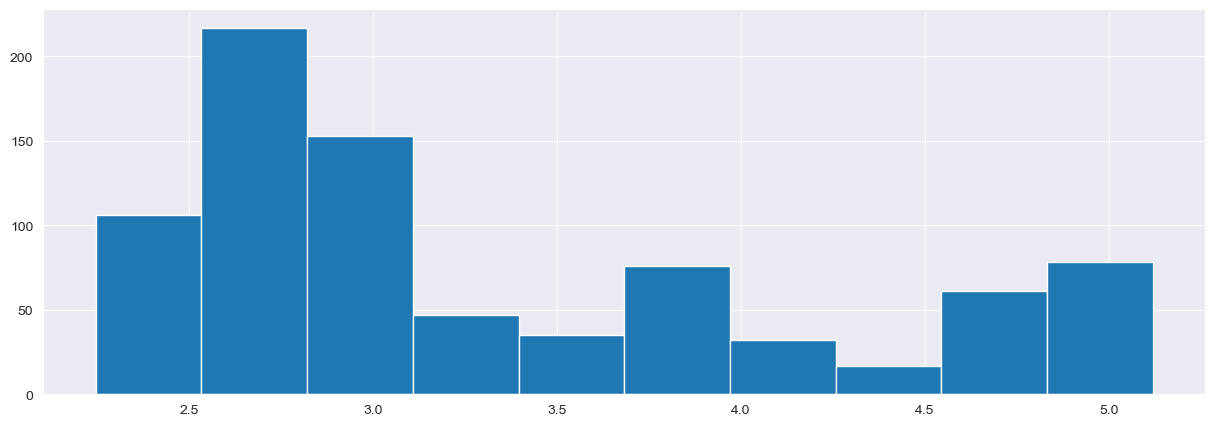

In [38]:
plt.figure(figsize=(15,5))
df_rio_gasolina['preco_medio_revenda'].hist()
plt.savefig("histograma.png")

In [24]:
sbn.set_style("darkgrid")

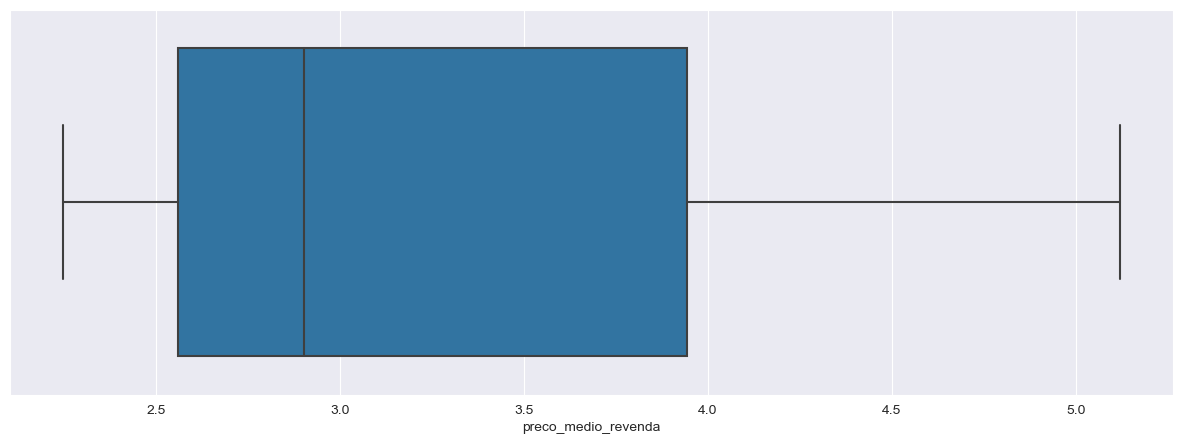

In [39]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=df_rio_gasolina, x="preco_medio_revenda")
plt.savefig("boxplot.png")

In [26]:
df_rio_gasolina['preco_medio_revenda'].describe()

count    822.000000
mean       3.303408
std        0.871114
min        2.247000
25%        2.559250
50%        2.903000
75%        3.942250
max        5.119000
Name: preco_medio_revenda, dtype: float64

## Gerando uma variação Percentual

In [27]:
df_rio_gasolina.head()

,dt_inicial,regiao,estado,produto,nm_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda
dt_final,,,,,,,,,,,
2005-01-01,2004-12-26,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1066,R$/l,2.293,0.101,2.050,2.749,0.212
2005-01-08,2005-01-02,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1096,R$/l,2.297,0.098,1.990,2.749,0.213
2005-01-15,2005-01-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1069,R$/l,2.292,0.101,2.039,2.749,0.213
2005-01-22,2005-01-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1094,R$/l,2.296,0.099,2.000,2.749,0.213
2005-01-29,2005-01-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1073,R$/l,2.290,0.103,2.009,2.749,0.205


In [28]:
df_tabela = df_rio_gasolina.groupby(df_rio_gasolina.index.year).agg({
    'preco_medio_revenda': np.mean
})

In [29]:
df_tabela.shift(1)

,preco_medio_revenda
dt_final,
2005,NaN
2006,2.338588
2007,2.561365
2008,2.532077
2009,2.546731
2010,2.564980
2011,2.647788
2012,2.832698
2013,2.852827


In [30]:
df_tabela['valor_ano_anterior'] = df_tabela.shift(1)

In [31]:
df_tabela

,preco_medio_revenda,valor_ano_anterior
dt_final,,
2005,2.338588,NaN
2006,2.561365,2.338588
2007,2.532077,2.561365
2008,2.546731,2.532077
2009,2.564980,2.546731
2010,2.647788,2.564980
2011,2.832698,2.647788
2012,2.852827,2.832698
2013,2.995442,2.852827


In [32]:
df_tabela = df_tabela.loc[2006:].copy()

In [33]:
round((df_tabela["preco_medio_revenda"] / df_tabela["valor_ano_anterior"] - 1) * 100, 2)

dt_final
2006     9.53
2007    -1.14
2008     0.58
2009     0.72
2010     3.23
2011     6.98
2012     0.71
2013     5.00
2014     4.56
2015    12.94
2016    10.75
2017     4.71
2018    18.35
2019     0.00
2020    -1.93
dtype: float64

In [34]:
df_tabela['variacao_percentual'] = round((df_tabela["preco_medio_revenda"] / df_tabela["valor_ano_anterior"] - 1) * 100, 2)

In [35]:
df_tabela

,preco_medio_revenda,valor_ano_anterior,variacao_percentual
dt_final,,,
2006,2.561365,2.338588,9.53
2007,2.532077,2.561365,-1.14
2008,2.546731,2.532077,0.58
2009,2.564980,2.546731,0.72
2010,2.647788,2.564980,3.23
2011,2.832698,2.647788,6.98
2012,2.852827,2.832698,0.71
2013,2.995442,2.852827,5.00
2014,3.132115,2.995442,4.56


In [36]:
df_tabela.to_excel("tabela_variacao_rio_gasolina.xlsx")